# Set up connection to Data Base

## (1) Enter user name and password to connect to data base

In [14]:
from database.db_setup import *

## (2) Looking at individual tables

Get table 'patients':

In [15]:
Patient()

patient_id patient ID,age age of patient,gender gender of patient,year year of surgery,removed_tissue information about removed tissue,epilepsy_type information about epilepsy type,additional_information space for additional information
60,1,x,2017,unknown,unknown,


In [16]:
Annotator()

annotator_id unique ID for each annotator,first_name first name of annotator,last_name last name of annotator,additional_information space for additional information
p1,max,mustermann,
p2,susi,lastname,


Get table 'movie_sessions':

In [4]:
SpikeTimesDuringMovie()

patient_id patient ID,unit_id unique ID for unit (for respective patient),session_nr session ID,spike_times in case bin_size is not 0: number of spikes; otherwise: times of spikes (original data)
60,0,1,=BLOB=
60,1,1,=BLOB=
60,2,1,=BLOB=
60,3,1,=BLOB=
60,4,1,=BLOB=
60,5,1,=BLOB=


## (3) Write queries using DataJoint to extract specific data from the data base

If you want to get the firing rates of patient 60, binned in seconds but only of the brain region 'LA', you can get it with the following query:

In [5]:
# Load in spike time files to local directory
list_of_spikes_LA_names = ((ElectrodeUnit & "brain_region = 'LA'" & "patient_id= '60'") * (SpikeTimesDuringMovie)).fetch('spike_times')

In [6]:
# Load spike time files into kernel
list_of_spikes_LA = np.load(list_of_spikes_LA_names[0])

# Remove spike time files from local directory
for name in list_of_spikes_LA_names:
    os.remove(name) 

In [7]:
list_of_spikes_LA

array([4.49860759e+08, 4.49862109e+08, 4.49862790e+08, ...,
       4.54656427e+08, 4.54661128e+08, 4.54661267e+08])

Getting a label from the data base:

In [8]:
label_tom_start_times = (MovieAnnotation & "label_name='tom'").fetch("start_times")[0]

In [9]:
label_tom_stop_times = (MovieAnnotation & "label_name='tom'").fetch("stop_times")[0]

In [10]:
label_tom_values = (MovieAnnotation & "label_name='tom'").fetch("values")[0]

Some commonly used queries are implemented as python functions in 'db_setup.py'

In [11]:
get_unit_id(csc_nr = 1, unit_type='M', unit_nr=2, patient_id=60)

1

## (4) Visualising data base structure

green rectangles: manual tables
    
    
blue ellipses: imported tables
    

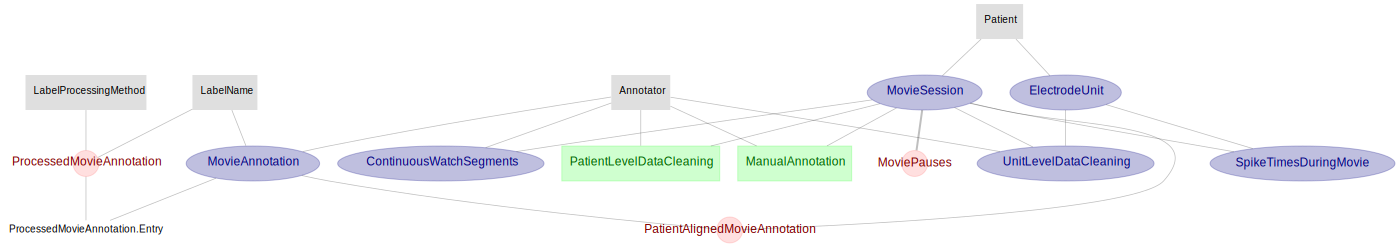

In [13]:
erd = dj.ERD(dhv_schema)
#erd.save("/home/tamara/Desktop/erd_20200515.png")
erd

In [17]:
MovieAnnotation()

annotator_id unique ID for each annotator,label_name label name,annotation_date date of annotation,values list of values that represent label,start_times list of start times of label segments in movie play time (PTS),stop_times list of stop times of label segments in movie play time (PTS),"category categoy of label; e.g. 'character', 'emotion', 'location'","indicator_function full indicator function, one value for each movie frame",additional_information space for additional information
p1,paul,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p1,rachel,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p1,tom,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p2,mckenzie,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p2,summer,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,


In [19]:
PatientAlignedMovieAnnotation()

annotator_id unique ID for each annotator,label_name label name,annotation_date date of annotation,session_nr session ID,patient_id patient ID,label_in_patient_time label matched to patient time (pts),values list of values that represent label,start_times list of start times of label segments in neural recording time,stop_times list of stop times of label segments in neural recording time,additionl_information
p1,paul,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p1,rachel,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p1,tom,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p2,mckenzie,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p2,summer,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
